<a href="https://colab.research.google.com/github/LaurenOKane/Learning-Python/blob/main/M9T6_Time_series_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

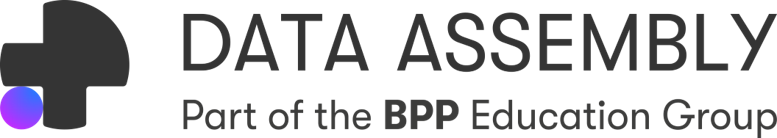

<h3><font color="#AA00BB">How you can use this Notebook</font></h3>
<p>This notebook was written to teach new concepts in data using Python.</p>
<p>You can read through the descriptions run the code (it should work!), or you may be taken through the code by one of our experts.</p>
<p>But one of the best habits to acquire is to re-write the code yourself.</p>
<ul><li>Experiment
<li>Break the code
<li>Build a deeper understanding of both the underlying data concepts and the code</ul>
<p>Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.</p>
<p>Enjoy!</p>
<p> - <i><font color="#AA00BB">Data Assembly team.</font></i></p>
<br>

> ❓🤔 = a question for us discuss

> ⌨️ = a task for you to try

> 🔑 = an authoritative reference or guide you may find useful

> 🚀 = **optional** material to develop yourself further



<a name="contents"></a>
## Contents

<br>1. [Time Series exploration](#section_1)
<br>2. [Checking for Stationarity - Augmented Dickey-Fuller Test](#section_2)
<br>3. [Autocorrelation and Partial Autocorrelation Plots](#section_3)
<br>4. [Creating an ARIMA model](#section_4)
<br>5. [The Prophet Library](#section_5)


<h2><font color="#AA00BB">Welcome to our workbook on Time Series Modelling!</font></h2>

Welcome to this lesson: on time series modelling and forecasting. In today's data-driven world, the ability to understand patterns in data over time and make accurate predictions is a crucial skill.



This topic will provide you with the knowledge and skills to handle time series data for forecasting future trends and events.



You will learn fundamentals like time series components, stationarity, autocorrelation, and tools like ARIMA and Facebook Prophet.



By the end of this e-learning, you will be equipped to uncover insights in temporal data, model complex seasonal patterns, and make more informed decisions through data-driven forecasting.

Let's get started!

<a name="section_1"></a>

# **1. Data Exploration**


[Return to contents](#contents)



Visualising the data will help us identify any underlying trends, seasonality, and signs of non-stationarity at a glance.

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'https://github.com/BPP-Digital-Advanced-Data-Analytics/public_datasets/raw/main/cell_site_data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
data.head()

,START_TIME,TOTAL_DATA_VOLUME_GB,DL_USER_THROUGHPUT_MBPS,DL_DATA_VOLUME_GB,UL_DATA_VOLUME_GB
0,2020-11-23 00:00:00,4.34,50.76,3.72,0.62
1,2020-11-23 01:00:00,1.55,49.13,1.44,0.11
2,2020-11-23 02:00:00,1.12,59.01,1.09,0.03
3,2020-11-23 03:00:00,0.35,47.45,0.24,0.11
4,2020-11-23 04:00:00,0.31,81.29,0.29,0.02


### **Visualisation**
After loading the data, the next step is to plot it to visually identify any trends, seasonality, and non-stationary behavior. This step is crucial for understanding the underlying patterns in your time series data.

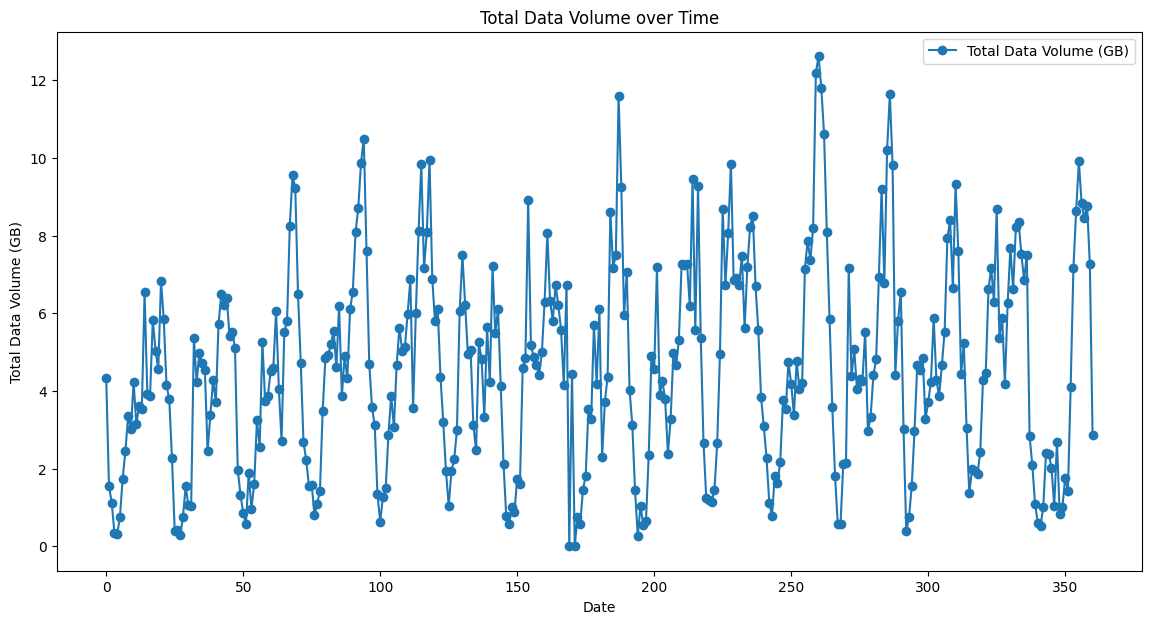

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['TOTAL_DATA_VOLUME_GB'], label='Total Data Volume (GB)', marker='o', linestyle='-')
plt.title('Total Data Volume over Time')
plt.xlabel('Date')
plt.ylabel('Total Data Volume (GB)')
plt.legend()
plt.show()

### **Smoothing using a Moving Average**



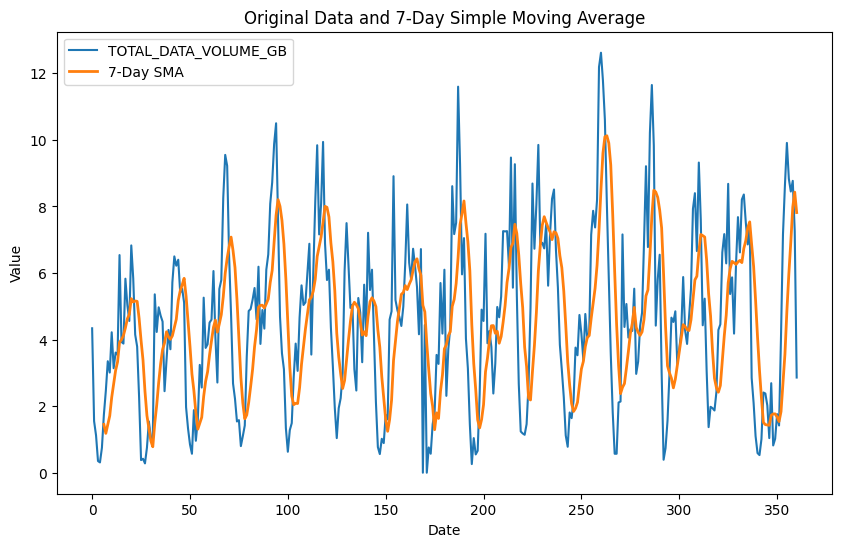

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already defined and has a date index
# If not, you'd need to load your data and set the date column as index, e.g.,
# data = pd.read_csv('your_data_file.csv')
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)

# Calculating the simple moving average with a 7-day window
sma_7 = data['TOTAL_DATA_VOLUME_GB'].rolling(window=7).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['TOTAL_DATA_VOLUME_GB'], label='TOTAL_DATA_VOLUME_GB')  # Ensure using .index for x-axis
plt.plot(sma_7.index, sma_7, label='7-Day SMA', linewidth=2)  # Ensure using .index for x-axis
plt.title('Original Data and 7-Day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## ⌨️ **Exercise**

1. Change the moving average window from 7 to 14 and see what happens?
2. Do you think the above plot shows a stionary or non-stationary time series?

---

<a name="section_2"></a>

# **2. Checking for Stationarity - Augmented Dickey-Fuller Test**


[Return to contents](#contents)

Next, we'll perform the Augmented Dickey-Fuller (ADF) test to quantitatively assess whether the **TOTAL_DATA_VOLUME_GB** time series is stationary.

This test gives us a more definitive indication of stationarity by looking at the p-value; a p-value less than 0.05 typically suggests that the series is stationary. Let's conduct the ADF test on this time series. ​​


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Performing the Augmented Dickey-Fuller test on TOTAL_DATA_VOLUME_GB
adf_test = adfuller(data['TOTAL_DATA_VOLUME_GB'])

adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output['Critical Value (%s)' % key] = value

adf_output

Test Statistic                -8.088240e+00
p-value                        1.400857e-12
#Lags Used                     1.400000e+01
Number of Observations Used    3.460000e+02
Critical Value (1%)           -3.449392e+00
Critical Value (5%)           -2.869930e+00
Critical Value (10%)          -2.571240e+00
dtype: float64


The Augmented Dickey-Fuller test results for the TOTAL_DATA_VOLUME_GB time series are as follows:

- Test Statistic: -8.088
- p-value: Approximately 1.40e-12
- Number of Lags Used: 14
- Number of Observations Used: 346
- Critical Value (1%): -3.449
- Critical Value (5%): -2.870
- Critical Value (10%): -2.571

Given that the p-value is significantly less than 0.05, we reject the null hypothesis of the presence of a unit root. This suggests that the TOTAL_DATA_VOLUME_GB time series is stationary and does not require differencing to make it stationary before applying ARIMA or other time series forecasting models.

## ⌨️ **Exercise**

**Run the code block below and answer the question.**


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Simplified question and options for better display
question = "What does a p-value less than 0.05 indicate in the ADF test?"
options = ['Stationary', 'Non-stationary', 'Inconclusive', 'Mean is zero']
correct_answer = options[0]  # 'Stationary' is the correct answer

# Create RadioButtons for options
radio_buttons = widgets.RadioButtons(options=options, description='Answers:')
submit_button = widgets.Button(description="Submit")
output = widgets.Output()

# Submission handler function
def on_submit(b):
    with output:
        clear_output()
        # Print the question for context
        print(question)
        if radio_buttons.value == correct_answer:
            print("Correct! Well done.")
        else:
            print(f"Incorrect. The correct answer is: {correct_answer}")

# Set up the interaction
submit_button.on_click(on_submit)

# Display the question above the options
print(question)
display(radio_buttons, submit_button, output)

What does a p-value less than 0.05 indicate in the ADF test?


RadioButtons(description='Answers:', options=('Stationary', 'Non-stationary', 'Inconclusive', 'Mean is zero'),…

Button(description='Submit', style=ButtonStyle())

Output()

---

<a name="section_3"></a>

# **3. Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots**


[Return to contents](#contents)

**ACF (Autocorrelation Function):**

- Purpose: The ACF plot reveals the degree of correlation between a time series and its past values (lags).
- Use in ARIMA: Helps tentatively identify the order of the AR term ('p') in an ARIMA model. Significant spikes in the ACF plot suggest lags that should be included.

**PACF (Partial Autocorrelation Function):**

- Purpose: The PACF plot measures the direct correlation between a time series and its lags, but it removes the influence of intermediate lags.
- Use in ARIMA: Primarily used to tentatively identify the order of the MA term ('q') in an ARIMA model. Again, significant spikes in the PACF plot signal potential lags to include.

In a nutshell, ACF and PACF plots are visual tools to help decide which past values and past errors have the most predictive power for our ARIMA model.

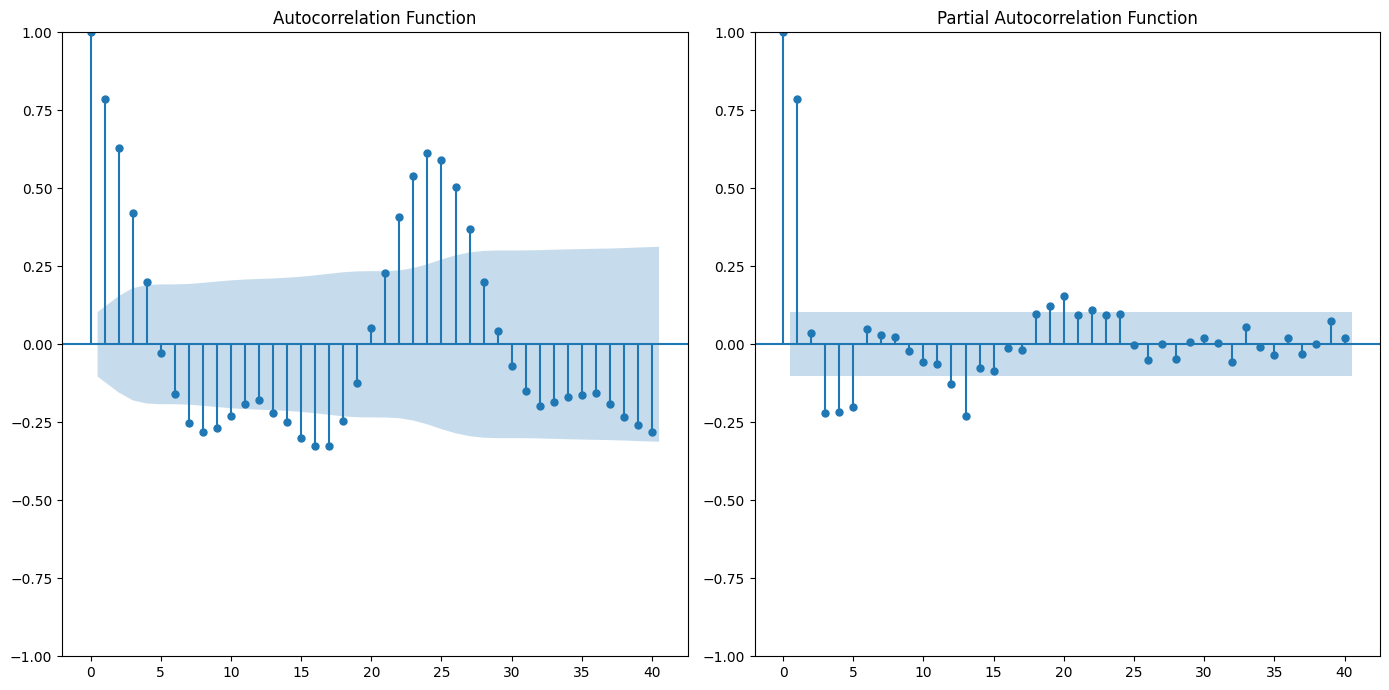

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the Autocorrelation Function (ACF)
plt.figure(figsize=(14, 7))
plt.subplot(121)
plot_acf(data['TOTAL_DATA_VOLUME_GB'], ax=plt.gca(), lags=40, title='Autocorrelation Function')

# Plotting the Partial Autocorrelation Function (PACF)
plt.subplot(122)
plot_pacf(data['TOTAL_DATA_VOLUME_GB'], ax=plt.gca(), lags=40, title='Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

The **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** plots provide insights into potential values for the ARIMA model parameters p and q, respectively:

- **ACF Plot**: Helps to identify the order of the MA component (q). You look for the lag after which most autocorrelations are not significantly different from zero.
- **PACF Plot**: Helps to identify the order of the AR component (p). You look for the lag after which most partial autocorrelations are not significantly different from zero.

**Interpretation:**
- From the **PACF** plot, it appears that the partial autocorrelations are significantly different from zero at a few initial lags and then cut off, suggesting potential values for p. A common approach is to look for where the plot crosses the confidence interval boundary for the first time, which might suggest the AR terms.
- From the **ACF** plot, the autocorrelations slowly decrease but remain above the significance level for several lags before dropping off, which can help in determining q, the MA terms.


These plots can help in the initial estimation of p and q for the ARIMA model. However, the exact determination of these parameters often requires further analysis and testing, including fitting multiple models with different p and q values and comparing their performance.

## ⌨️ **Exercise**

Run the code block below and answer the question.


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

question1 = "What does the ACF plot primarily help identify in the context of ARIMA modelling?"
options1 = ['Order of the AR component (p)', 'Order of the MA component (q)', 'Significance level for lags', 'Confidence interval boundaries']
correct_answer1 = options1[1]  # 'Order of the MA component (q)'

radio_buttons1 = widgets.RadioButtons(options=options1, description='Answers:')
submit_button1 = widgets.Button(description="Submit")
output1 = widgets.Output()

def on_submit1(b):
    with output1:
        clear_output()
        print(question1)
        if radio_buttons1.value == correct_answer1:
            print("Correct! Well done.")
        else:
            print(f"Incorrect. The correct answer is: {correct_answer1}")

submit_button1.on_click(on_submit1)

print(question1)
display(radio_buttons1, submit_button1, output1)


What does the ACF plot primarily help identify in the context of ARIMA modelling?


RadioButtons(description='Answers:', options=('Order of the AR component (p)', 'Order of the MA component (q)'…

Button(description='Submit', style=ButtonStyle())

Output()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

question2 = "What does the PACF plot primarily help identify in the context of ARIMA modelling?"
options2 = ['Order of the MA component (q)', 'Order of the AR component (p)', 'Total number of lags', 'Autocorrelation significance']
correct_answer2 = options2[1]  # 'Order of the AR component (p)'

radio_buttons2 = widgets.RadioButtons(options=options2, description='Answers:')
submit_button2 = widgets.Button(description="Submit")
output2 = widgets.Output()

def on_submit2(b):
    with output2:
        clear_output()
        print(question2)
        if radio_buttons2.value == correct_answer2:
            print("Correct! Well done.")
        else:
            print(f"Incorrect. The correct answer is: {correct_answer2}")

submit_button2.on_click(on_submit2)

print(question2)
display(radio_buttons2, submit_button2, output2)


What does the PACF plot primarily help identify in the context of ARIMA modelling?


RadioButtons(description='Answers:', options=('Order of the MA component (q)', 'Order of the AR component (p)'…

Button(description='Submit', style=ButtonStyle())

Output()

---

<a name="section_4"></a>

# **4. Creating an ARIMA model**


[Return to contents](#contents)

To proceed with specifying an ARIMA model, we'll use estimates derived from the ACF and PACF plots to choose initial values for the ARIMA parameters **p** (the order of the AR part) and **q** (the order of the MA part). Given that the exact values for **p** and **q** are not explicitly identified from the plots in our discussion, we'll choose reasonable estimates based on common practices:

- **p:** The number of significant lags in the PACF plot before it cuts off could suggest the AR terms. Let's assume **p = 2** as a starting point, indicating two significant lags in the PACF plot.
- **d:** Given the time series has already been identified as stationary, we can set **d = 0**, meaning no differencing is needed.
- **q:** The ACF plot indicated autocorrelations that slowly taper off. We might start with **q = 2** based on the significant lags in the ACF plot.
These values are starting points. The optimal model parameters are typically identified through iterative fitting and evaluation, often using criteria such as AIC (Akaike Information Criterion) for model comparison.

Let's fit an ARIMA model with these initial parameters to the TOTAL_DATA_VOLUME_GB time series.



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Specifying the ARIMA model with initial estimates for p, d, and q
model = ARIMA(data['TOTAL_DATA_VOLUME_GB'], order=(2, 0, 2))

# Fitting the model
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     TOTAL_DATA_VOLUME_GB   No. Observations:                  361
Model:                   ARIMA(2, 0, 2)   Log Likelihood                -665.597
Date:                  Fri, 09 Feb 2024   AIC                           1343.194
Time:                          17:42:45   BIC                           1366.528
Sample:                               0   HQIC                          1352.471
                                  - 361                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5792      0.268     17.109      0.000       4.055       5.104
ar.L1          1.6058      0.072     22.334      0.000       1.465       1.747
ar.L2         -0.7730      0.059    -13.010      0.000      -0.889      -0.657
ma.L1         -0.9566      0.079    -12.146      0.000      -1.111      -0.802
ma.L2          0.4542      0.053      8.502      0.000       0.349       0.559
sigma2         2.3286      0.163     14.310      0.000       2.010       2.648
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 6.30
Prob(Q):                              0.67   Prob(JB):                         0.04
Heteroskedasticity (H):               1.37   Skew:                             0.25
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **Evaluating the Model's Residuals:**

We'll plot the residuals to assess their distribution and autocorrelation, aiming to verify if they resemble white noise, indicating a well-fitting model.

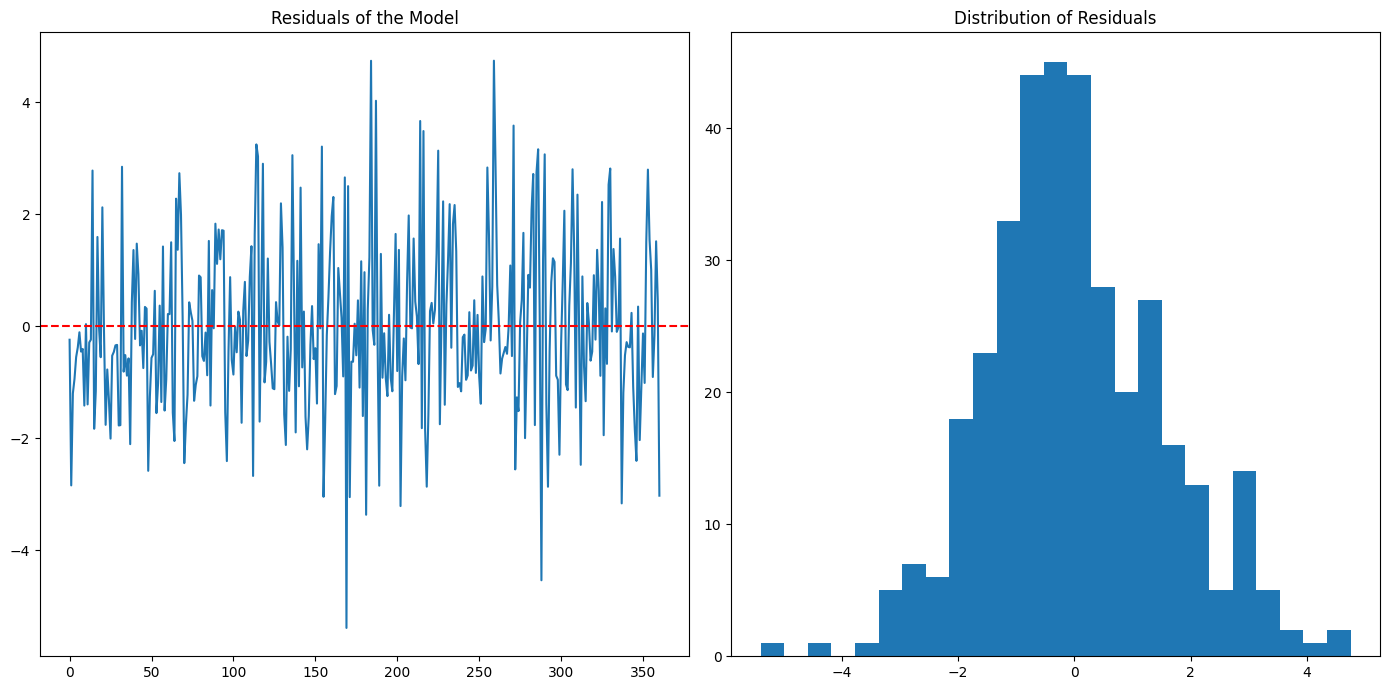

<Figure size 700x400 with 0 Axes>

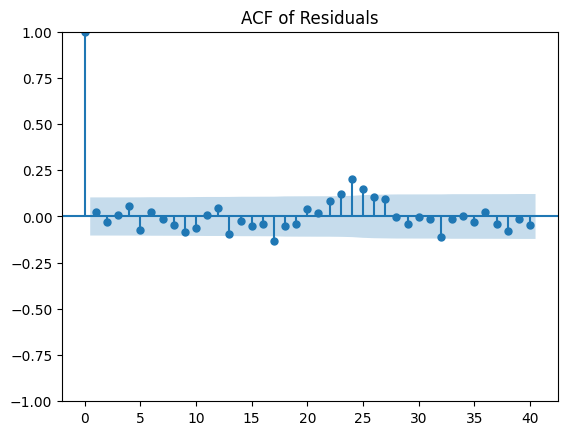

In [ ]:
# Step 1: Evaluating the Model's Residuals

# Extracting the residuals
residuals = model_fit.resid

# Plotting the residuals to assess their distribution
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals of the Model')
plt.axhline(y=0, linestyle='--', color='red')

plt.subplot(122)
plt.hist(residuals, bins=25)
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Plotting ACF of residuals to check for autocorrelation
plt.figure(figsize=(7, 4))
plot_acf(residuals, lags=40, title='ACF of Residuals')
plt.show()


### **Residuals Evaluation**
The plots provide insights into the residuals of the fitted ARIMA model:

- The **time plot of residuals** shows fluctuations around zero, indicating no obvious patterns or trends, which is a good sign. However, there are a few spikes, suggesting occasional deviations from the model predictions.
- The **histogram** reveals the distribution of the residuals, aiming for a normal distribution. The distribution seems reasonably centered around zero, though it might not be perfectly normal.
- The **ACF plot of residuals** indicates the autocorrelation at different lags. Ideally, we want the autocorrelations to be within the confidence interval (blue shaded area), suggesting that the residuals are uncorrelated and resemble white noise.

### **Forecasting Future Values**
Next, we'll forecast future values using the fitted ARIMA model. This will provide us with predicted values and confidence intervals for the next few time points. Let's forecast the next 5 periods

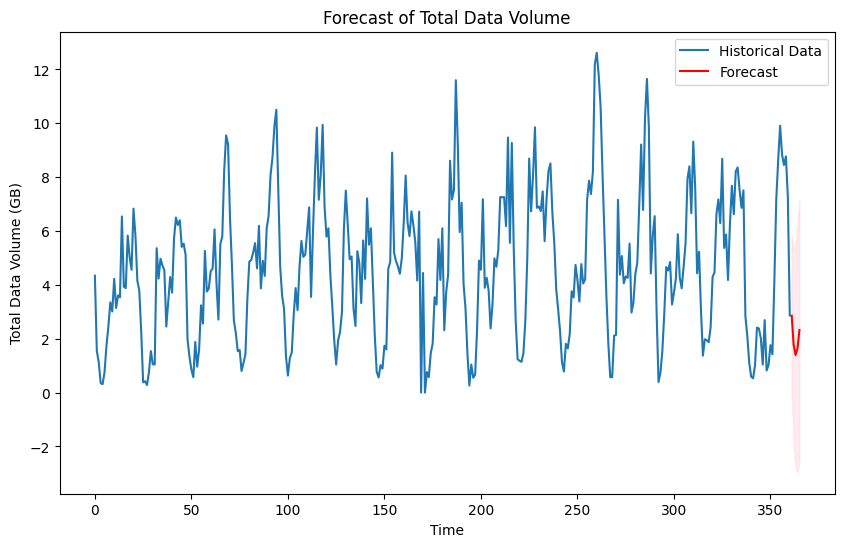

TOTAL_DATA_VOLUME_GB,mean,mean_se,mean_ci_lower,mean_ci_upper
361,2.853895,1.525976,-0.136963,5.844753
362,1.763556,1.819325,-1.802255,5.329368
363,1.391589,2.128190,-2.779586,5.562764
364,1.637104,2.354552,-2.977733,6.251941
365,2.318860,2.475407,-2.532848,7.170568


In [ ]:
# Step 2: Forecasting Future Values

# Forecasting the next 5 time points
forecast = model_fit.get_forecast(steps=5)
forecast_summary = forecast.summary_frame()

# Plotting the forecast along with the historical data and confidence intervals
plt.figure(figsize=(10, 6))

# Historical data
plt.plot(data['TOTAL_DATA_VOLUME_GB'], label='Historical Data')

# Forecasted values
plt.plot(forecast_summary.index, forecast_summary['mean'], label='Forecast', color='red')

# Confidence intervals
plt.fill_between(forecast_summary.index,
                 forecast_summary['mean_ci_lower'],
                 forecast_summary['mean_ci_upper'],
                 color='pink', alpha=0.3)

plt.title('Forecast of Total Data Volume')
plt.xlabel('Time')
plt.ylabel('Total Data Volume (GB)')
plt.legend()
plt.show()

forecast_summary


### **Interpreting the Plot**

The forecast for the next 5 periods shows the predicted Total Data Volume (GB) along with the historical data and confidence intervals:

- The **red line** represents the forecasted values, projecting how the total data volume might trend in the immediate future.
- The **pink shaded area** indicates the confidence intervals for these forecasts, reflecting the uncertainty associated with each prediction.

### **Forecast Summary:**
- The model forecasts a range of values for the total data volume, starting from approximately 2.85 GB at the first forecasted point, with a varying degree of uncertainty as reflected by the confidence intervals.
- The forecast suggests that the total data volume might slightly decrease after the last historical data point but remains within a certain range, as indicated by the mean forecast values and their confidence intervals.

## ⌨️ **Exercise**

1. Project 30 days into the future with the above ARIMA model and plot the forecast?
2. Using a 30 day project, edit the p, d, and q values to see how they affect the forecast.

---

<a name="section_5"></a>

# **5. The Prophet Library**


[Return to contents](#contents)


Prophet is a forecasting library developed by Facebook's Core Data Science team. It focuses on automating time series forecasting, particularly those with strong seasonality and trends.

**What it offers:**
- **Ease of Use**: Designed to be accessible to people without extensive modeling experience.
- **Automatic Handling**: Provides sensible defaults for many parameters, allowing you to get decent forecasts quickly.
- **Seasonality & Holidays**: Built-in capabilities to handle various seasonal patterns (daily, weekly, yearly) and even incorporate holiday effects.
- **Flexibility**: While it defaults to automation, you can fine-tune aspects of the modeling if needed.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw26mex8u/u8rmpy43.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw26mex8u/awi5v7l1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71077', 'data', 'file=/tmp/tmpw26mex8u/u8rmpy43.json', 'init=/tmp/tmpw26mex8u/awi5v7l1.json', 'output', 'file=/tmp/tmpw26mex8u/prophet_modelpbj9xp1r/prophet_model-20240209182713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:27:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:27:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


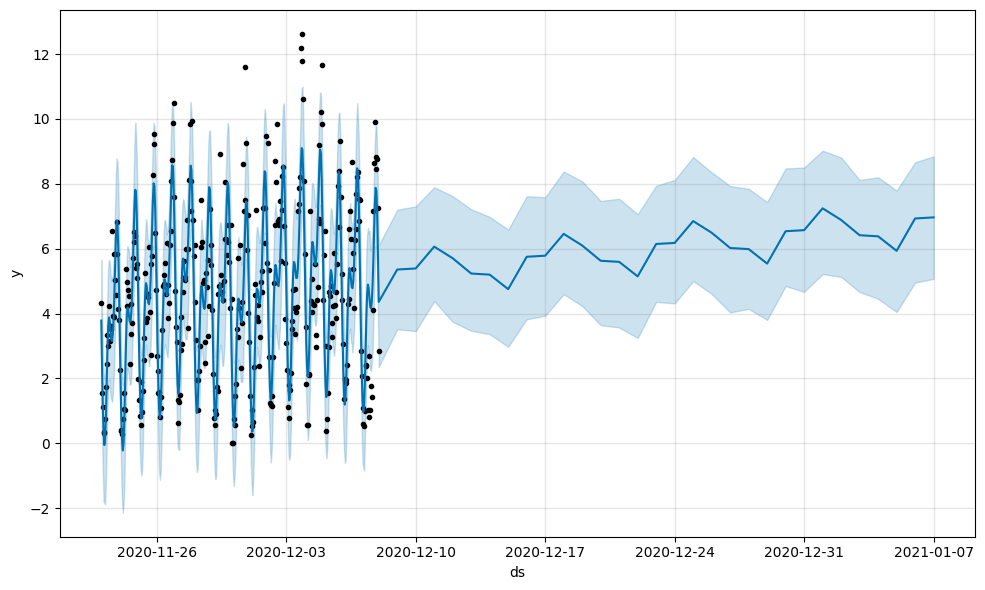

In [ ]:
import pandas as pd
from prophet import Prophet

# Assuming you've loaded your data into a DataFrame named 'cell_data'
cell_data = pd.read_excel('cell_site_data.xlsx')

# Preparing the data for Prophet
# Prophet requires the columns to be named 'ds' for the date and 'y' for the value
cell_data_prophet = cell_data.rename(columns={'START_TIME': 'ds', 'TOTAL_DATA_VOLUME_GB': 'y'})

# Initialize the Prophet model
model = Prophet()

# Fit the model with the data
model.fit(cell_data_prophet)

# Create a future dataframe for predictions (for example, for the next 30 days)
future = model.make_future_dataframe(periods=30)

# Use the model to make predictions
forecast = model.predict(future)

# Plotting the forecast
fig = model.plot(forecast)
fig.show()

### **Explanation of the above code**

- **Import**:  Necessary libraries (pandas for data work, Prophet for forecasting) are imported.

- **Load Data**: The code loads time series data from an Excel file ('cell_site_data.xlsx').

- **Format Data**: Data is renamed to match Prophet's requirements ('ds' for date, 'y' for the target value).

- **Create Model**: A Prophet model is initialized.

- **Train Model**:  The model learns patterns from the provided data.

- **Prepare Future Dates**: A DataFrame is created to hold the future dates you want to forecast.

- **Generate Predictions**:  The model uses its learned patterns to predict values for the future dates.

## **5.1 Now let's plot the Components of the Plot**

**What Prophet Component Plots Show**

Prophet is an additive model, meaning it breaks down a time series into core components. The plot_components function visualizes these:

- **Trend**: The overall long-term direction of your time series (increasing, decreasing, or relatively flat).
- **Yearly Seasonality**: Repetitive patterns that occur on a yearly cycle (e.g., sales increasing during the holiday season).
- **Weekly Seasonality**: Patterns repeating on a weekly cycle (e.g., weekday vs. weekend traffic fluctuations).
- **Holidays & Special Events**: The impact of known holidays or special events that are defined in the model.

#### **Why We Use Component Plots**

- **Understand Your Dat**a:  Component plots reveal the underlying driving forces in your time series. Do strong trends or seasonal patterns dominate? Are there unusual effects at certain times?
- **Model Diagnostics**: The component plots can diagnose potential issues with your model:
- **Non-captured patterns**: If your component plots show strong patterns the forecast doesn't seem to reflect, it suggests your model might need refinement.
- **Overfitting**: Sometimes overly complex models start fitting 'noise' instead of true patterns. Examining components can offer clues about this.
- **Explainability**: If you need to explain your forecasts to stakeholders, component plots help decompose the reasons why the model predicts certain rises or falls.

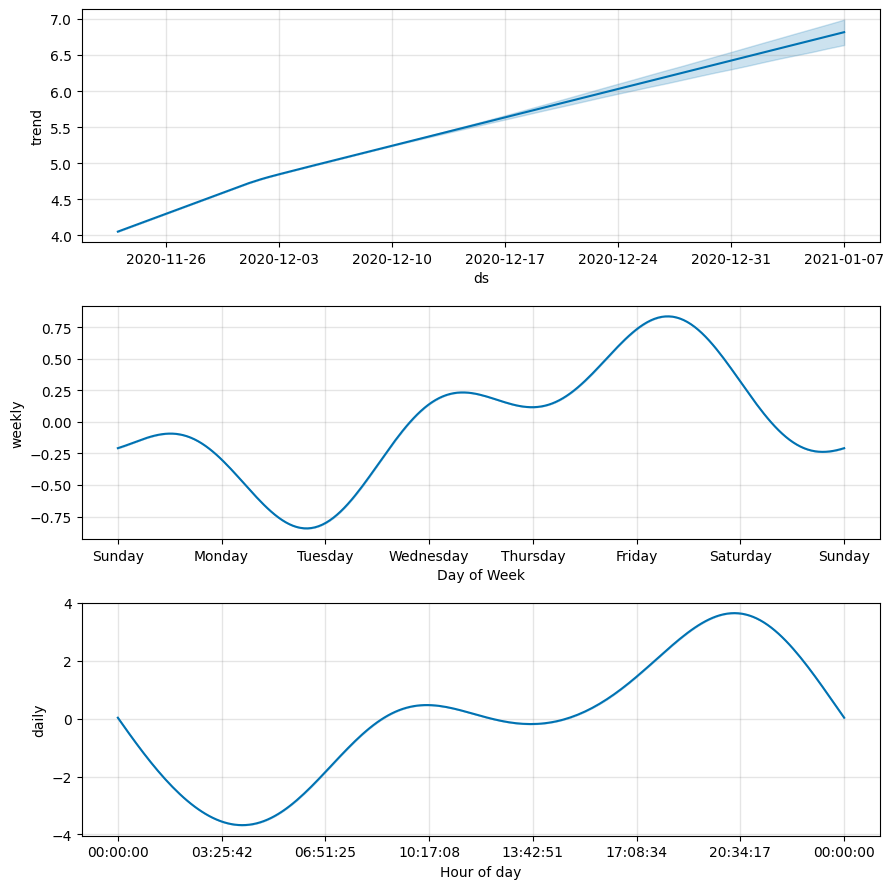

In [ ]:
# Optional: Plotting the forecast components
components_fig = model.plot_components(forecast)
components_fig.show()

### **Interpreting the Componenent Plots**

- **Trend (Top Plot)**: This plot shows the overall trend component of the time series data. The trend is upwards, which indicates that whatever is being measured is increasing over time. The shaded area represents the uncertainty interval of the forecasted trend, which suggests that the model is relatively confident about the increasing trend.

- **Weekly Seasonality (Middle Plot)**: This subplot reveals the weekly pattern or seasonality in the data. It looks like there is a cyclical pattern that repeats on a weekly basis. The values seem to peak around the middle of the week and are at their lowest at the beginning and the end of the week. This could imply that the measured activity is higher mid-week.

- **Daily Seasonality (Bottom Plot)**: The third subplot shows the daily pattern or seasonality. There is a clear cycle within each day. The activity decreases to its lowest point at the earliest hours of the morning, begins to rise, peaking at around midday, then drops slightly before peaking again in the evening, and finally drops at the end of the day. This suggests two periods of higher activity within a day, potentially aligned with standard work or activity hours.

## **5.2 Changepoints**

Changepoints are points in time where the time series have abrupt changes in their trajectory. Prophet automatically detects these points and allows for these changes. By default, Prophet is set to detect these changepoints in the first 80% of the time series, but this can be adjusted.

Here's how you can adjust changepoints in Prophet:

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw26mex8u/uq3gcgj8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw26mex8u/j3fo45n6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52980', 'data', 'file=/tmp/tmpw26mex8u/uq3gcgj8.json', 'init=/tmp/tmpw26mex8u/j3fo45n6.json', 'output', 'file=/tmp/tmpw26mex8u/prophet_model7anbpodr/prophet_model-20240209184334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


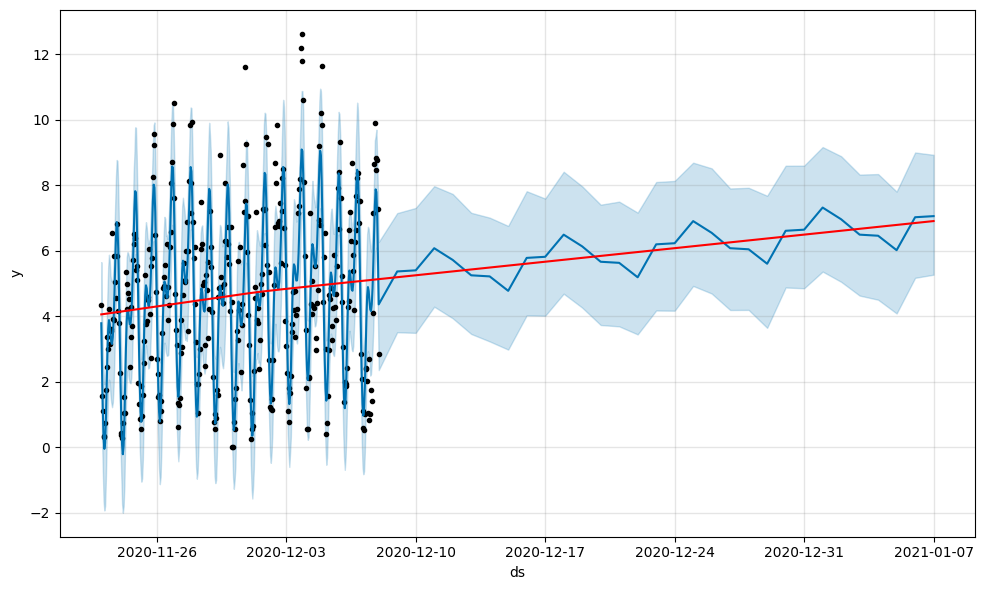

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

# Assuming you've loaded your data into a DataFrame named 'cell_data'
cell_data = pd.read_excel('cell_site_data.xlsx')

# Preparing the data for Prophet
# Prophet requires the columns to be named 'ds' for the date and 'y' for the value
cell_data_prophet = cell_data.rename(columns={'START_TIME': 'ds', 'TOTAL_DATA_VOLUME_GB': 'y'})

# Set the changepoint_range to 0.9 to include the first 90% of the time series
model = Prophet(changepoint_range=0.9)

# Fit the model with the data
model.fit(cell_data_prophet)

# Create a future dataframe for predictions (for example, for the next 30 days)
future = model.make_future_dataframe(periods=30)

# Use the model to make predictions
forecast = model.predict(future)

# Plotting the forecast
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

## **5.3 Including Holidays**
To account for holidays or specific events that could affect the predictions, you can add them to the Prophet model. Prophet requires a DataFrame with two columns: holiday and ds (datestamp of the holiday).

**NOTE**:

If you want to see the effect of holidays clearly, you should ensure that the holiday dates are within the range of the historical data and the future predictions. Also, you can plot the components of the forecast to see the holiday effects more clearly:

Here's how you can include holidays:

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw26mex8u/hsy8x6ek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw26mex8u/3kj_u9qw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40934', 'data', 'file=/tmp/tmpw26mex8u/hsy8x6ek.json', 'init=/tmp/tmpw26mex8u/3kj_u9qw.json', 'output', 'file=/tmp/tmpw26mex8u/prophet_model1ycn1tda/prophet_model-20240209184537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:45:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:45:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


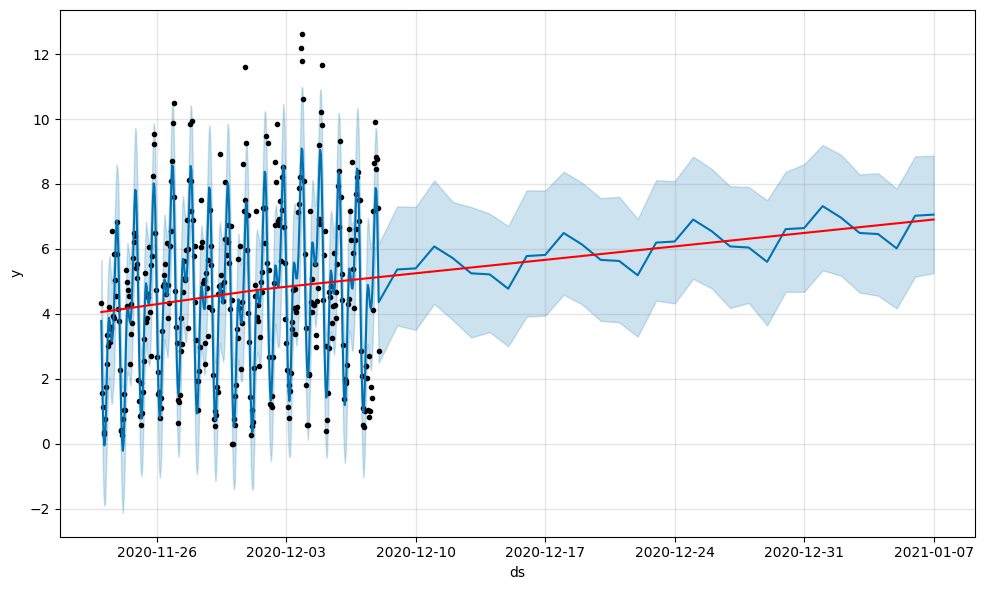

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define holidays if applicable
holidays = pd.DataFrame({
  'holiday': 'example_holiday',
  'ds': pd.to_datetime(['2024-01-01', '2024-12-25']),
})

# Initialize the Prophet model with changepoints and holidays
model = Prophet(changepoint_range=0.9, holidays=holidays)

# Fit the model with the data
model.fit(cell_data_prophet)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=30)

# Use the model to make predictions
forecast = model.predict(future)

# Plotting the forecast with changepoints
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

## **5.4 Evaluation Metrics**
After fitting the model and making forecasts, it's essential to evaluate the model's performance. Common evaluation metrics for time series forecasting are MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error), and MAPE (Mean Absolute Percentage Error).

Here's how you can calculate evaluation metrics:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into train and test sets
train = cell_data_prophet[:-30]  # all data except last 30 days
test = cell_data_prophet[-30:]  # last 30 days

# Fit the model on the train set
model = Prophet()
model.fit(train)

# Make predictions on the test set
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Calculate evaluation metrics
forecasted = forecast[-30:]['yhat']  # predictions for last 30 days
true_values = test['y']
mse = mean_squared_error(true_values, forecasted)
mae = mean_absolute_error(true_values, forecasted)

print(f'MSE: {mse}')
print(f'MAE: {mae}')


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw26mex8u/1t21cp78.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw26mex8u/h1_tg77l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52432', 'data', 'file=/tmp/tmpw26mex8u/1t21cp78.json', 'init=/tmp/tmpw26mex8u/h1_tg77l.json', 'output', 'file=/tmp/tmpw26mex8u/prophet_model04bdifz7/prophet_model-20240209184621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:46:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:46:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE: 32.32737198003526
MAE: 4.747793818771515


## ⌨️ **Exercise**

1. Turn on weekly seasonality in the model with a short code change.
  - **Hint**: Add weekly_seasonality=True to the Prophet initialisation.
2. Add "local_festival" on '2024-07-15' to the model's holidays.
  - **Hint**: Use holidays.append() with a new row for "local_festival".
3. Make the trend more flexible by changing one parameter.
  - **Hint**: Increase changepoint_prior_scale above the default of 0.05.
4.  Predict further into the future, up to 90 days.
---